In [1]:
# Chapter 3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Read height - weight dataset
dataset = np.loadtxt('book_code/Section 2/height-weight.csv', delimiter=',')

In [3]:
#dataset.head()

In [4]:
dataset.shape

(5000, 2)

In [5]:
dataset[:10]

array([[ 73.84701702, 241.8935632 ],
       [ 68.78190405, 162.3104725 ],
       [ 74.11010539, 212.7408556 ],
       [ 71.7309784 , 220.0424703 ],
       [ 69.88179586, 206.3498006 ],
       [ 67.25301569, 152.2121558 ],
       [ 68.78508125, 183.9278886 ],
       [ 68.34851551, 167.9711105 ],
       [ 67.01894966, 175.9294404 ],
       [ 63.45649398, 156.3996764 ]])

In [6]:
# Separate data
X = dataset[:,0]
Y = dataset[:,1]

In [7]:
X.shape

(5000,)

In [8]:
X[:10]

array([73.84701702, 68.78190405, 74.11010539, 71.7309784 , 69.88179586,
       67.25301569, 68.78508125, 68.34851551, 67.01894966, 63.45649398])

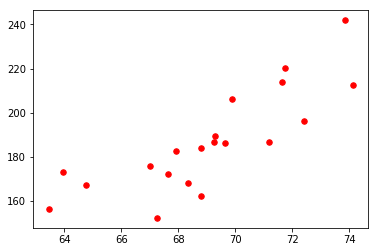

In [9]:
plt.scatter(X[:20], Y[:20], color='red', s=30)

In [10]:
# Split the data into training and test
# Training data
X_train = X[:4500]
y_train = Y[:4500]
# Test dataset
X_test = X[4500:]
y_test = Y[4500:]

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4500,)
(4500,)
(500,)
(500,)


In [12]:
# There is a reshape explained in the video that doesn't work here
X_train = X_train.reshape(-1, 1)
X_train.shape

(4500, 1)

In [13]:
X_train[:,:10]

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [64.45121158],
       [67.38177284],
       [71.36636548]])

In [14]:
y_train = y_train.reshape(-1, 1)
y_train.shape

(4500, 1)

In [15]:
y_train[:,:10]

array([[241.8935632],
       [162.3104725],
       [212.7408556],
       ...,
       [147.0446574],
       [179.319259 ],
       [199.8815852]])

In [16]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [17]:
# Train the model
regr.fit(X_train, y_train)

/Users/samael/src/code_repos/machine_learning/ml-playground/python/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
# Reshape test vectors
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [19]:
# Predictions
y_pred = regr.predict(X_test)

In [20]:
# The coefficients
print("Coefficients:\n{}".format(regr.coef_))

Coefficients:
[[5.94515497]]


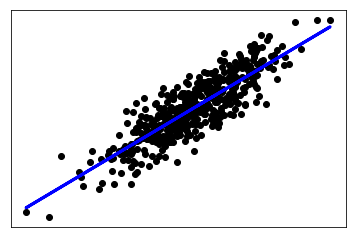

In [21]:
# Plot outputs
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [22]:
# WHERE THE FUCK IS THE USE OF THE MEAN SQUARE ERROR? (AGAIN)
print("Mean square error: {:0.2f}".format(mean_squared_error(y_test, y_pred)))

Mean square error: 97.10


In [23]:
# R2 score
print("Variance Score (1 is perfect prediction) -> {:.2f}".format(r2_score(y_test, y_pred)))

Variance Score (1 is perfect prediction) -> 0.74


In [24]:
###
# Predicting energy output of a power plant
###
power_dataset = np.loadtxt('book_code/Section 2/power.csv', delimiter=',')

In [25]:
power_dataset.shape

(9568, 5)

In [26]:
power_dataset[:10]

array([[  14.96,   41.76, 1024.07,   73.17,  463.26],
       [  25.18,   62.96, 1020.04,   59.08,  444.37],
       [   5.11,   39.4 , 1012.16,   92.14,  488.56],
       [  20.86,   57.32, 1010.24,   76.64,  446.48],
       [  10.82,   37.5 , 1009.23,   96.62,  473.9 ],
       [  26.27,   59.44, 1012.23,   58.77,  443.67],
       [  15.89,   43.96, 1014.02,   75.24,  467.35],
       [   9.48,   44.71, 1019.12,   66.43,  478.42],
       [  14.64,   45.  , 1021.78,   41.25,  475.98],
       [  11.74,   43.56, 1015.14,   70.72,  477.5 ]])

In [27]:
# Another module import
from sklearn.model_selection import train_test_split

In [29]:
# Split features from labels, independent variable Ambient Temperature (AT),Exhaust Vacuum (EV), Ambient Pressure (AP), Relative Humidity (RH) into X 
# and dependent variable energy output into y
X = power_dataset[:, 0:4]
y = power_dataset[:, 4]

In [30]:
# We split training / test data
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Test the shapes
print(X_training.shape)
print(y_training.shape)
print(X_test.shape)
print(y_test.shape)

(7654, 4)
(7654,)
(1914, 4)
(1914,)


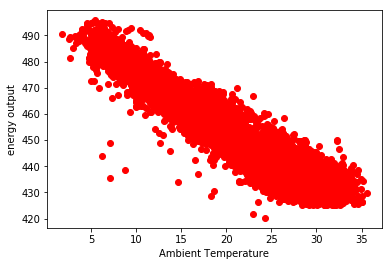

In [32]:
# Plotting outputs Ambient temperature vs energy output
plt.scatter(X_training[:, 0], y_training, color='red')
plt.xlabel('Ambient Temperature')
plt.ylabel('energy output')
plt.show()

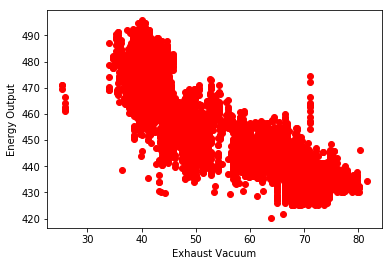

In [34]:
# Energy output vs exhaust vacuum
plt.scatter(X_training[:, 1], y_training, color='red')
plt.xlabel('Exhaust Vacuum')
plt.ylabel('Energy Output')
plt.show()

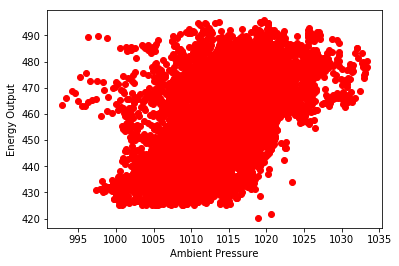

In [35]:
# EO vs Ambient Pressure
plt.scatter(X_training[:, 2], y_training, color='red')
plt.xlabel('Ambient Pressure')
plt.ylabel('Energy Output')
plt.show()

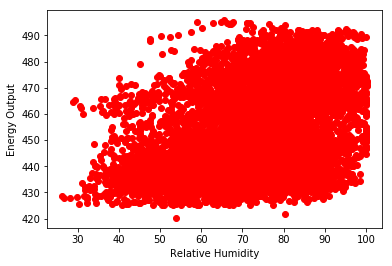

In [36]:
# Plot EO vs Relative Humidity
plt.scatter(X_training[:, 3], y_training, color='red')
plt.xlabel('Relative Humidity')
plt.ylabel('Energy Output')
plt.show()

In [37]:
# Create the linear regression object
power_regr = linear_model.LinearRegression()